# Exercise 1: Signals and systems

> *Type name(s) of participant(s):*

Necessary imports (run this block before any other code):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

## Section 1: Plane waves

A plane wave in two dimensions is described by $ f(x, y) = e^{i(k_{x}x + k_{y}y)} $, with $k_x, k_y \in \mathbb{R}$. 

### Task 1.1
> Write a program that calculates a 2D plane wave for any given $k_x$, $k_y$.

In [2]:
# Type your code in this cell:
import numpy as np
import matplotlib.pyplot as plt
import sympy

x=sympy.Symbol('x')
y=sympy.Symbol('y')

kx = float(input("Enter the wave number kx: "))
ky = float(input("Enter the wave number ky: "))

ou=sympy.exp(1j * (kx * x + ky * y))
print(ou)

### Task 1.2
> Display and examine Re(f), Im(f), Abs(f), and Phase(f) for a selection of $k_x$, $k_y$.

In [3]:
# Type your code in this cell:
import numpy as np
import matplotlib.pyplot as plt

def plane_wave(kx, ky, x, y):
    return np.exp(1j * (kx * x + ky * y))

# Parameters for the plane wave
kx = 2 * np.pi / 5  # wave number in the x direction
ky = 2 * np.pi / 5  # wave number in the y direction

# Create a grid of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Calculate the wave function
F = plane_wave(kx, ky, X, Y)

# Calculate Re, Im, Abs, and Phase
Re_F = np.real(F)
Im_F = np.imag(F)
Abs_F = np.abs(F)
Phase_F = np.angle(F)

# Set up the plots
plt.figure(figsize=(16, 12))

# Plot Real Part
plt.subplot(2, 2, 1)
plt.title('Real Part of the Plane Wave')
plt.imshow(Re_F, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar(label='Re(f)')
plt.xlabel('x')
plt.ylabel('y')

# Plot Imaginary Part
plt.subplot(2, 2, 2)
plt.title('Imaginary Part of the Plane Wave')
plt.imshow(Im_F, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar(label='Im(f)')
plt.xlabel('x')
plt.ylabel('y')

# Plot Absolute Value
plt.subplot(2, 2, 3)
plt.title('Absolute Value of the Plane Wave')
plt.imshow(Abs_F, extent=(-10, 10, -10, 10), origin='lower', cmap='viridis')
plt.colorbar(label='|f|')
plt.xlabel('x')
plt.ylabel('y')

# Plot Phase
plt.subplot(2, 2, 4)
plt.title('Phase of the Plane Wave')
plt.imshow(Phase_F, extent=(-10, 10, -10, 10), origin='lower', cmap='twilight')
plt.colorbar(label='Phase (radians)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


### Task 1.3
> What determines the direction of the wave?

*Type your answer in this cell:*wavelength

### Task 1.4
> What is the wavelength as a function of $k_x$, $k_y$?

*Type your answer in this cell:*2pie/kx,2pie/ky

### Task 1.5
> Think of some linear, shift-invariant (LSI) operation and apply it to the plane wave.

*Type your answer in this cell:*

In [4]:
# Type your code in this cell:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import sympy

sigma = 2
x=sympy.Symbol('x')
y=sympy.Symbol('y')

kx = float(input("Enter the wave number kx: "))
ky = float(input("Enter the wave number ky: "))

ou=sympy.exp(1j * (kx * x + ky * y))

ou_magnitude = np.abs(ou)

u_filtered = gaussian_filter(ou_magnitude, sigma=sigma)

print(u_filtered)

### Task 1.6
> What happens to the wave?typically the wave is smoothed

*Type your answer in this cell:*typically it will smooth out the rapid oscillations of the wave. 

## Section 2: Fast Fourier Transform

This section studies the behavior of the fast Fourier transform (FFT) using a rectangle signal as input: the prepared 1D input vector is of length 256 and has a rectangle of length 16 at the center. Run the code and answer the questions.

In [5]:
n = 256
m = 16

rect = np.zeros(n)
ind1 = int(n/2-m/2)
ind2 = int(n/2+m/2)
rect[ind1:ind2] = 1

The following code cell calculates and displays the FFT of the input vector straightforwardly.

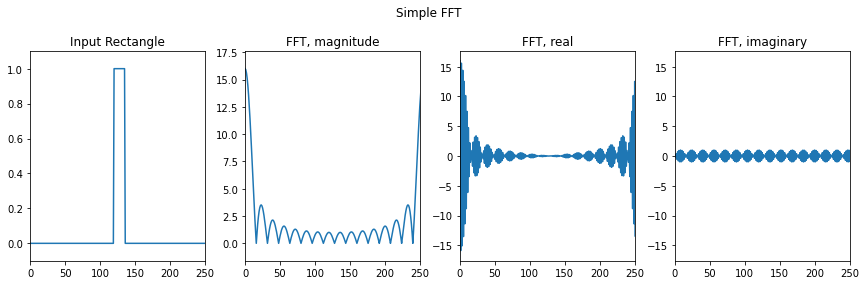

In [6]:
trafo = np.fft.fft(rect)

# define plot ranges
range1 = [-0.1, 1.1];                                                          
range2 = np.multiply([-0.1, 1.1], max(abs(trafo)))
range3 = np.multiply([-0.3, 1.1], max(abs(trafo)))                                                                  
range4 = np.multiply([-1.1, 1.1], max(abs(trafo)))

yranges = [range1, range2, range4, range4]
titles = ["Input Rectangle", "FFT, magnitude", "FFT, real", "FFT, imaginary"]
arrays_to_plot = [rect, np.abs(trafo), np.real(trafo), np.imag(trafo)]

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("Simple FFT")
for i in range(4):
    axes[i].plot(arrays_to_plot[i])
    axes[i].set_ylim(yranges[i])
    axes[i].set_xlim([0, 250])
    axes[i].set_title(titles[i])
fig.tight_layout() 

### Task 2.1
> Why is the sinc-shaped Fourier transform split in two halves?

*Type your answer in this cell:*Its even symmetry .The presence of both positive and negative frequency components

The next code cell performs 'fftshift' on the transform, which swaps its first and second halves. 

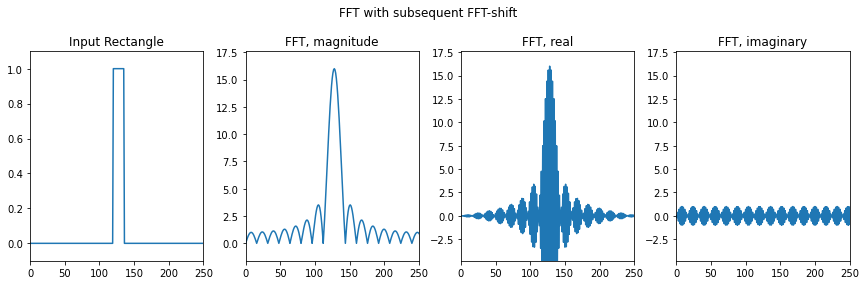

In [7]:
trafo = np.fft.fftshift(np.fft.fft(rect))

yranges = [range1, range2, range3, range3]
arrays_to_plot = [rect, np.abs(trafo), np.real(trafo), np.imag(trafo)]
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("FFT with subsequent FFT-shift")
for i in range(4):
    axes[i].plot(arrays_to_plot[i])
    axes[i].set_ylim(yranges[i])
    axes[i].set_xlim([0, 250])
    axes[i].set_title(titles[i])   
fig.tight_layout()

### Task 2.2
> Why does the phase of the transform oscillate rapidly? Isn’t the rectangle symmetric so that the transform should be purely real?

*Type your answer in this cell:*
Fourier transform captures both amplitude and phase information. The oscillations in the phase occur due to the discontinuities at the edges of the rectangular pulse. The abrupt changes create rapid variations in the frequency domain, leading to oscillations in the phase.

The next code cell includes phase correction, shifting the origin in the original domain to the center of the rectangle. Review the related lecture notes.

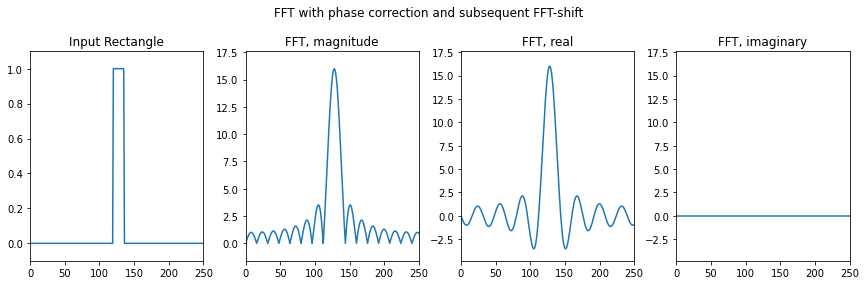

In [8]:
delta_k = 2*np.pi/n                                                 # calculate sample spacing in the Fourier domain
ind1 = int(-n/2)
ind2 = int(n/2)
index_array = np.arange(ind1,ind2)
k = np.multiply(index_array,delta_k)                                # create vector of sampling positions in the Fourier domain
x0 = -(n-1)/2                                                       # actual position of first input sample
trafo = np.exp(-1j*k*x0)*np.fft.fftshift(np.fft.fft(rect))          # include phase correction after FFT

arrays_to_plot = [rect, np.abs(trafo), np.real(trafo), np.imag(trafo)]
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("FFT with phase correction and subsequent FFT-shift")
for i in range(4):
    axes[i].plot(arrays_to_plot[i])
    axes[i].set_ylim(yranges[i])
    axes[i].set_xlim([0, 250])
    axes[i].set_title(titles[i])   
fig.tight_layout()

The next code cell attempts to shift the origin simply by fftshift instead, similar to what it does in the Fourier domain.

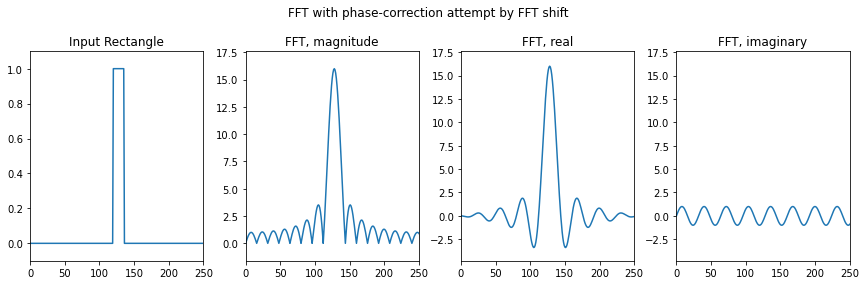

In [9]:
trafo = np.fft.fftshift(np.fft.fft(np.fft.fftshift(rect)))

arrays_to_plot = [rect, np.abs(trafo), np.real(trafo), np.imag(trafo)]
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("FFT with phase-correction attempt by FFT shift")
for i in range(4):
    axes[i].plot(arrays_to_plot[i])
    axes[i].set_ylim(yranges[i])
    axes[i].set_xlim([0, 250])
    axes[i].set_title(titles[i])   
fig.tight_layout()

### Task 2.3
> As you see, this works only almost. Why doesn’t it work fully?

*Type your answer in this cell:*It cannot rectify discontinuities phase

## Section 3: Build a comb

### Task 3.1
> Build a 1D comb function by starting with a single point impulse in the center and successively adding impulses on the left and right. At each stage, calculate and examine the Fourier transform. What happens?

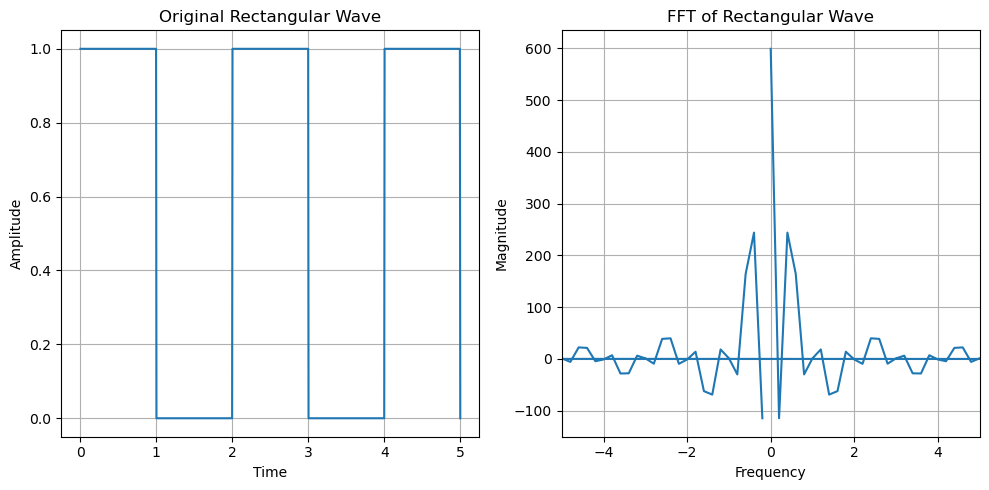

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 矩形波参数
T = 2  # 周期
t = np.linspace(0, 5, 1000)  # 时间轴
rect_wave = np.where((t % T) < (T / 2), 1, 0)  # 矩形波

# 傅里叶变换
frequencies = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # 频率轴
fft_rect =np.fft.fft(np.fft.fftshift(rect_wave)).real   # 计算傅里叶变换

# 绘制结果
plt.figure(figsize=(15, 5))

# 绘制原始矩形波
plt.subplot(1, 3, 1)
plt.title('Original Rectangular Wave')
plt.plot(t, rect_wave)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

# 绘制傅里叶变换的幅度谱
plt.subplot(1, 3, 2)
plt.title('FFT of Rectangular Wave')
plt.plot(frequencies, fft_rect)
plt.xlim(-5, 5)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()


*Type your answer in this cell:*
More peaks come out with increasing the number of square.

### Task 3.2
> What happens when you vary $\Delta x$ of the original comb?

*Type your answer in this cell:*
The length for fourier transform also change.